Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Linear Data

In this example we'll be using the Boston Housing dataset. There are 506 rows in the dataset. The target variable is median home price. There are 13 predictor variables including average number of rooms per dwelling, crime rate by town, etc. More information about this dataset can be found at https://www.kaggle.com/c/boston-housing



This data frame contains the following columns:

**crim**
per capita crime rate by town.

**zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**
proportion of non-retail business acres per town.

**chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**
nitrogen oxides concentration (parts per 10 million).

**rm**
average number of rooms per dwelling.

**age**
proportion of owner-occupied units built prior to 1940.

**dis**
weighted mean of distances to five Boston employment centres.

**rad**
index of accessibility to radial highways.

**tax**
full-value property-tax rate per $10,000.

**ptratio**
pupil-teacher ratio by town.

**black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**
lower status of the population (percent).

**medv**
median value of owner-occupied homes in $1000s.

In [4]:
from sklearn.datasets import load_boston 

In [5]:
columnss = ['Crime Rate','Residential Proportion','non-retail business acres/Town','Charles River',
            'NO2 concentration','Average Rooms/Dwelling.','Prior Built Units Proportion','Distance to Employment Centres',
            'Radial Highways Distance','ValueProperty/tax rate','Teacher/town','blacks/town','Lower Status Percent']

In [6]:
boston = load_boston()

In [9]:
df = pd.DataFrame(boston.data, columns = columnss)


In [12]:
df['median home price'] = boston.target

In [13]:
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
df.to_csv('Boston.csv', index=False)

### Creating Independent and Dependent Variables

In [15]:
X = df.drop(['median home price'], axis=1)
Y = df[['median home price']]
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


### Normalization

In [16]:
# scale the features
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)

X = pd.DataFrame(x_scaled_minmax, columns = columnss)
X.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### Train Test Splitting

<img src='train_test_split1.png' width=80%, height=80% >

In [17]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


### Training Model, Predicting & Testing

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(xtrain, ytrain)

LinearRegression()

In [20]:
pred = model.predict(xtest)

In [21]:
model.coef_

array([[-10.25416832,   5.05163648,   0.7465737 ,   0.73047106,
         -9.22588505,  21.03952249,  -0.4688927 , -17.04518353,
          8.45182117,  -8.73511563,  -9.26613212,   2.95271586,
        -16.64030396]])

In [22]:
model.intercept_

array([27.43583278])

### **Checking r2 by sklearn metric**

R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

In [23]:
from sklearn.metrics import r2_score
test_r2=r2_score(ytest,pred)

In [24]:
train_r2=r2_score(ytrain,model.predict(xtrain))

In [25]:
print('R2 score for testing:',test_r2 )
print('R2 score for training:',train_r2 )

R2 score for testing: 0.7133593313710358
R2 score for training: 0.7435787589010061


In [26]:
r_2 = []
for i in range(1, (xtest.shape[-1])+1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i],ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,prd))

Text(0,0.5,'R_2 Score')

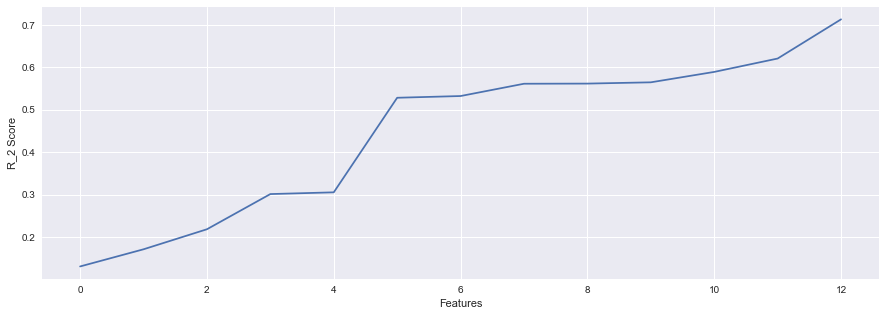

In [27]:
plt.figure(figsize=(15,5))
plt.plot(r_2);
plt.xlabel('Features')
plt.ylabel('R_2 Score')

### Adjusted R2 Calculation

<img src='https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2013/09/r-squared-adjusted.jpg' width=200, height=400 >

In [28]:
import adj_helper as helper
helper.adjR2(xtest,ytest,test_r2)

The adjusted R2 is: 0.6863569495436697


**Ploting Residual Plots**

A residual is the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The ResidualsPlot Visualizer shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually well-suited for the data; otherwise, a non-linear model is more appropriate. The following example shows a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well.

Yellowbrick's ResidualsPlot Visualizer also displays a histogram of the error values along the right-hand side. In the example above, the error is normally distributed around zero, which also generally indicates a well-fitted model. If the histogram is not desired, it can be turned off with the hist=False flag.

In [28]:
#!pip install yellowbrick

C:\Users\Chaudhry_M_Huzaifa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


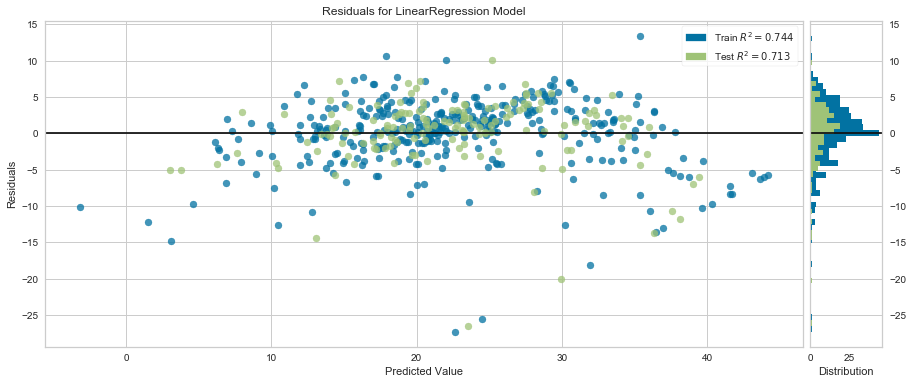

In [29]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6)) 
visualizer = ResidualsPlot(model,hist=True)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()    

## 3 Recursive Feature Elimination
The sklearn package has several feature selection methods and details can be found at the [documentation][feature link] site. In this example we'll be using the recursive feature elimination method. This process starts with all variables and assigns weights to them. Those with small weights are first removed. The remaining variables are used to refit the model and the process repeats. 

We start by importing the packages that'll be used. 

[feature link]: http://scikit-learn.org/stable/modules/feature_selection.html

In [30]:
from sklearn.feature_selection import RFE

In [31]:
lrm = LinearRegression()

In [32]:
# recursive feature elimination with cross validation, using r-squared as metric
rfe = RFE(estimator=lrm, step=3)
rfe.fit(X, np.hstack(Y.values))

RFE(estimator=LinearRegression(), step=3)

In [33]:
feature_name = np.array(columnss)
list(feature_name[rfe.support_])

['Crime Rate',
 'NO2 concentration',
 'Average Rooms/Dwelling.',
 'Distance to Employment Centres',
 'Teacher/town',
 'Lower Status Percent']

In [34]:
# print the optimal number of feature
print("Optimal number of features : %d" % rfe.n_features_)

# save the selected features
feature_cols_selected = list((feature_name)[rfe.support_])
print("Features selected: " + str(feature_cols_selected))

Optimal number of features : 6
Features selected: ['Crime Rate', 'NO2 concentration', 'Average Rooms/Dwelling.', 'Distance to Employment Centres', 'Teacher/town', 'Lower Status Percent']


Once the features to include are selected, we can use them to fit the model. While the scaled features were used in the RFE step above, we'll use the original values for fitting the model. This way we don't have to tranform the data when making predictions.

In [35]:
xtrain_new = xtrain[list(feature_name[rfe.support_])]
xtest_new = xtest[list(feature_name[rfe.support_])]
print(xtrain_new.shape)
print(xtest_new.shape)

(354, 6)
(152, 6)


In [36]:
print(ytrain.shape)
print(ytest.shape)

(354, 1)
(152, 1)


In [37]:
lm2 = LinearRegression()
lm2.fit(xtrain_new, ytrain)

LinearRegression()

In [38]:
pred_new=lm2.predict(xtest_new)

In [39]:
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(r2_score(ytest, pred_new)))

The R-squared value is: 0.6804 



**Adjusted r2**

In [40]:
helper.adjR2(xtest_new,ytest,r2_score(ytest, pred_new))

The adjusted R2 is: 0.6671730504971617


### Cross Validation

<img src='https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/07_cross_validation_diagram.png' width=200, height=400 >

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
scores = cross_val_score(lm2, xtrain_new, ytrain, cv=10)

In [43]:
print(scores)

[0.70169031 0.7890865  0.75516823 0.74065932 0.75860497 0.44534634
 0.71508647 0.4871517  0.77556776 0.69034911]


In [44]:
print(scores.mean())

0.6858710720800456


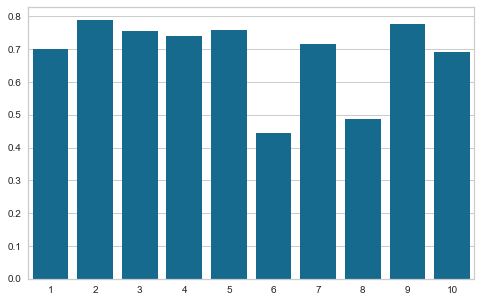

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
plt.show()